# Random Over Sampling ( Top 5 Algorithms )

*Radom Over Sampling is a technique where you create duplicates and can possibly lead to overfitting*

In [2]:
import pandas as pd
import seaborn as sns

*Loading data. This dataset can be found here - https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease*

In [3]:
df=pd.read_csv(r"C:\\Users\\sunta\\OneDrive\\Desktop\\data\\sampling\\hear_data\\heart_2020_cleaned.csv")

In [4]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


*Target Variable is HeartDisease. These values are hugely imbalanced*

c:\Users\sunta\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\sunta\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='HeartDisease', ylabel='count'>

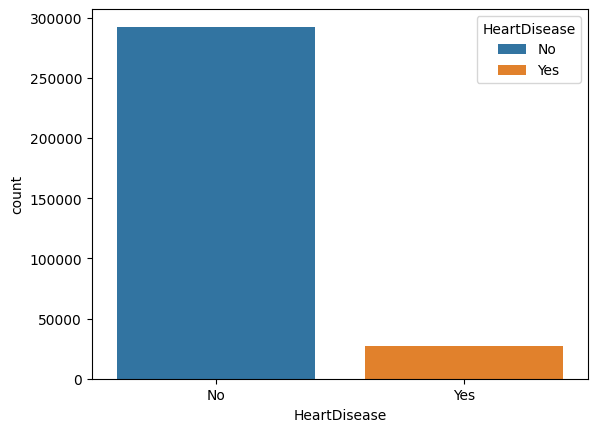

In [5]:
sns.countplot(data=df,x='HeartDisease',hue='HeartDisease',legend=True)


In [6]:
target_no,target_yes=df.HeartDisease.value_counts()

*widely used python library*

*imabalanced learn*

In [7]:
#pip  install imbalanced-learn

In [15]:
X=df.drop(['HeartDisease',"Race"], axis=1)
y=df['HeartDisease']

<Axes: xlabel='HeartDisease', ylabel='count'>

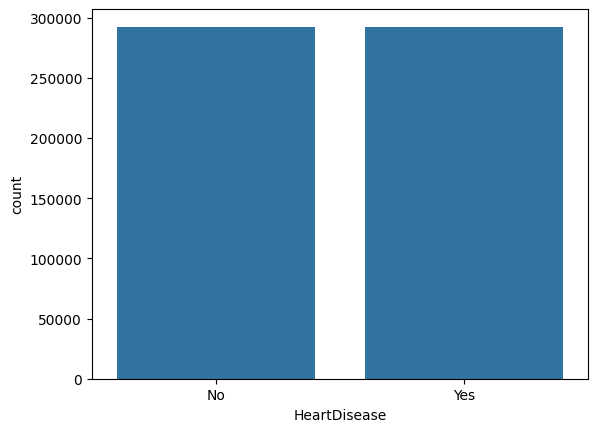

In [28]:
from imblearn.over_sampling import RandomOverSampler
X_ROS,Y_ROS = RandomOverSampler(sampling_strategy='minority').fit_resample(X,y)
sns.countplot(x=Y_ROS)

*Couple of important notes--*

*Random Over Sampler will just duplicate the data. Not generate/synthesize new datapoints.*

*Everytime you generate different data as it has randomness. Unless you set Randomstate(which produces exact same results everytime. espcl.used in debugging)*

*Does not skip any data points*

*X & Y always match in shape & oreder to preserve features & labels*

*Drawbacks-It can lead to overfitting, reducing the model's ability to generalize to new, unseen data*

# SMOTE - Synthetic Minority Oversampling Technique

*Generates synthetic data points for the minority class. This techniques helps to overcome overfitting.*

In [34]:
from sklearn.model_selection import  cross_val_score
# now you can import normally from model_selection
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
df1 = df.copy(deep = True)


col = list(df.columns)
categorical_features = []
numerical_features = []
for i in df1.columns:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        df1[i]=le.fit_transform(df1[i])
        categorical_features.append(i)

In [35]:
X=df1.drop(['HeartDisease',"Race"], axis=1)
y=df1['HeartDisease']

In [38]:
X = X.drop(columns=['AgeCategory'])

c:\Users\sunta\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\sunta\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='HeartDisease', ylabel='count'>

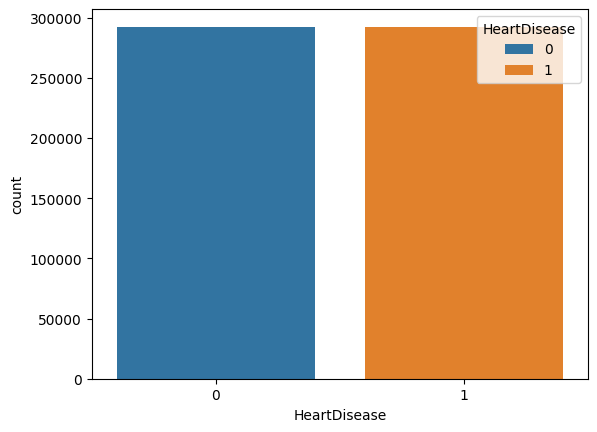

In [41]:
from imblearn.over_sampling import SMOTE

X_smote, Y_smote = SMOTE(sampling_strategy='minority').fit_resample(X,y)
sns.countplot(x=Y_smote,hue=Y_smote)

*Important notes-*

*Helps balance class distribution without overfitting as much as Random Oversampling*

*SMOTE does this:

*Pick a random minority sample (say, A).*

*Find its k nearest neighbors (e.g., B).*

*Pick one of those neighbors randomly (say, B).*

*Generate a synthetic sample somewhere between A and B:*

*New point = A + (B - A) * δ*

*Where δ is a random number between 0 and 1*

*📍 Result: A new point somewhere on the line segment from A to B — not a duplicate!*

*Some drawbacks*

*Works only on numeric data*

*Less overfitting*

*Should be only be used on training dataset to avoid data leakage*

# ADASYN (Adaptive Synthetic Algorithm for oversampling)

*It’s an oversampling technique like SMOTE, but more focused.
While SMOTE generates synthetic samples evenly, ADASYN is adaptive — it generates more samples in hard-to-learn (borderline) areas.*

*ADASYN focuses on balancing the data where the model struggles.*

In [42]:
from imblearn.over_sampling import ADASYN

c:\Users\sunta\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\sunta\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='HeartDisease', ylabel='count'>

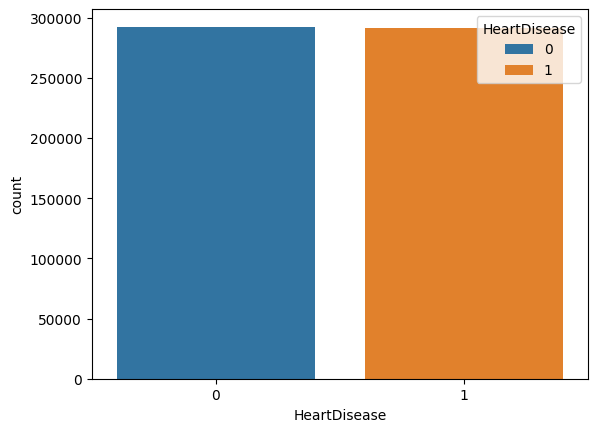

In [43]:
X_adasyn, y_adasyn = ADASYN(sampling_strategy='minority').fit_resample(X,y)
sns.countplot(x=y_adasyn,hue=y_adasyn)

*Import points to notice*

*Numeric values only.*

*Can overfit & sensitive to noise*

*Works best on binary or multiclass classification. Combine with cross-validation to make sure it is not overfitting*

--Next SMOTE-N, SMOTE-NC